In [1]:
import pybamm as pb;import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
for k in range(0,1):
    mpl.rcParams["axes.labelsize"] = fs
    mpl.rcParams["axes.titlesize"] = fs
    mpl.rcParams["xtick.labelsize"] =  fs
    mpl.rcParams["ytick.labelsize"] =  fs
    mpl.rcParams["legend.fontsize"] =  fs
    mpl.rcParams['font.sans-serif'] = ['Times New Roman']
    mpl.rcParams['font.serif'] = ['Times New Roman']
    mpl.rcParams['axes.unicode_minus'] = False
# Create GIF
def create_gif(image_list, gif_name, ds):
    frames = []
    for image_name in image_list:
        if image_name.endswith('.png'):
            print(image_name)
            frames.append(imageio.imread(image_name))
    # Save them as frames into a gif
    imageio.mimsave(gif_name, frames, 'GIF', duration = ds)
    return
import openpyxl


In [2]:
from Fun_RioWholeModel import (GetScan,Run_model_w__dry_out ,Cal_new_con_Update,Run_Model_Base_On_Last_Solution,Run_Model_Base_On_Last_Solution_RPT,write_excel_xlsx,)


In [3]:
# Get global setting:
for i in range(0,1):  
    Total_Cycles = 16; Cycle_bt_RPT = 4; Update_Cycles = 2;  
    CyclePack = [Total_Cycles,Cycle_bt_RPT,Update_Cycles];
    # Key scan parameters:
    Ratio_excess = [1.0,];
    cs_Neg_Init = [28920,]; Diff_SEI = [1.700000000000002e-20,];    
    R_SEI = [2E5,];   Bulk_Sol_Con =[ 4541.0,];
    D_Li_inSEI = [1e-20];    # default: 1e-20 
    c_Li_inte_ref = [15];    # default: 15
    Couple_SEI_LiP = [1e-6]; # default: 1e-6
    k_LiP = [1E-9,1e-7,];         # default: 1e-10
    (TotalScan, DatePack_scan) = GetScan(Ratio_excess,cs_Neg_Init,Diff_SEI,R_SEI,Bulk_Sol_Con,D_Li_inSEI,c_Li_inte_ref,Couple_SEI_LiP,k_LiP);
    BasicPath = 'D:/OneDrive - Imperial College London/SimDataSave/P2R2/'; # Need to change for Ruan PC
    Target  = 'debug c_EC/'
    if not os.path.exists(BasicPath + Target):
        os.mkdir(BasicPath + Target);
    book_name_xlsx = '16 cycles.xlsx';

    sheet_name_xlsx = 'Results'
    value3 = [
        ["Index", "cs_Neg_Init", "Diff_SEI", "R_SEI", 
        "Bulk_Sol_Con","D_Li_inSEI", "c_Li_inte_ref",
        "Couple_SEI_LiP","k_LiP","Cap Loss","LLI to LiP",
        "LLI to SEI","Vol_Elely_Tot Final", "Vol_Elely_JR Final","Width Final"],
        ]
    write_excel_xlsx(BasicPath + Target+book_name_xlsx, sheet_name_xlsx, value3)

Successfully create a excel file


Initial electrolyte amount is  5.3677182000000006 mL
Electrolyte is being squeezed out, check plated lithium (reversible part)


The linesearch algorithm failed with too small a step.
The linesearch algorithm failed with too small a step.


Succeed in 19 minutes, 17 seconds
This is the  1  scan
Initial electrolyte amount is  5.3677182000000006 mL
Electrolyte is being squeezed out, check plated lithium (reversible part)
Succeed in 18 minutes, 15 seconds
This is the  2  scan


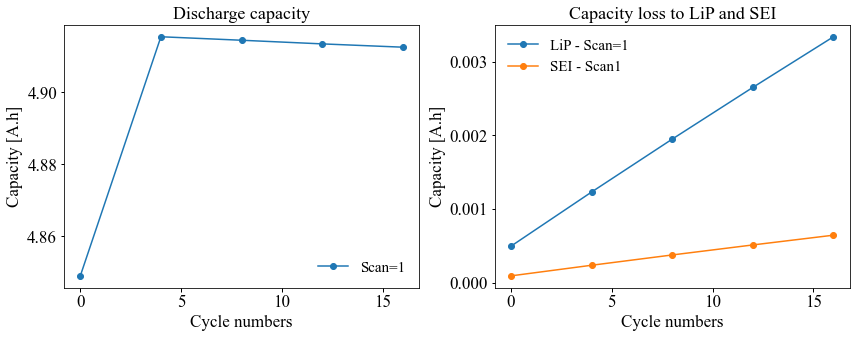

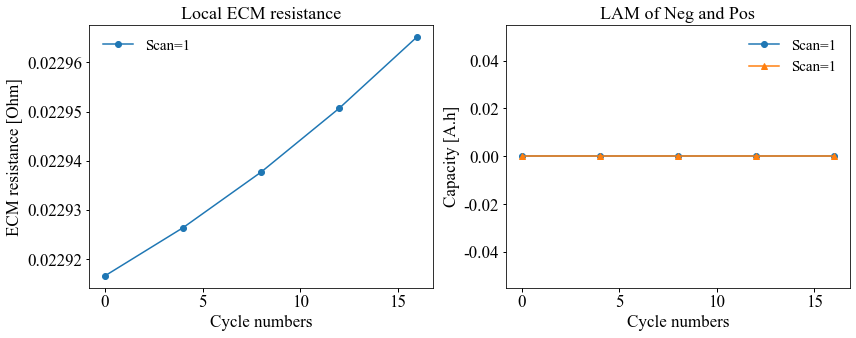

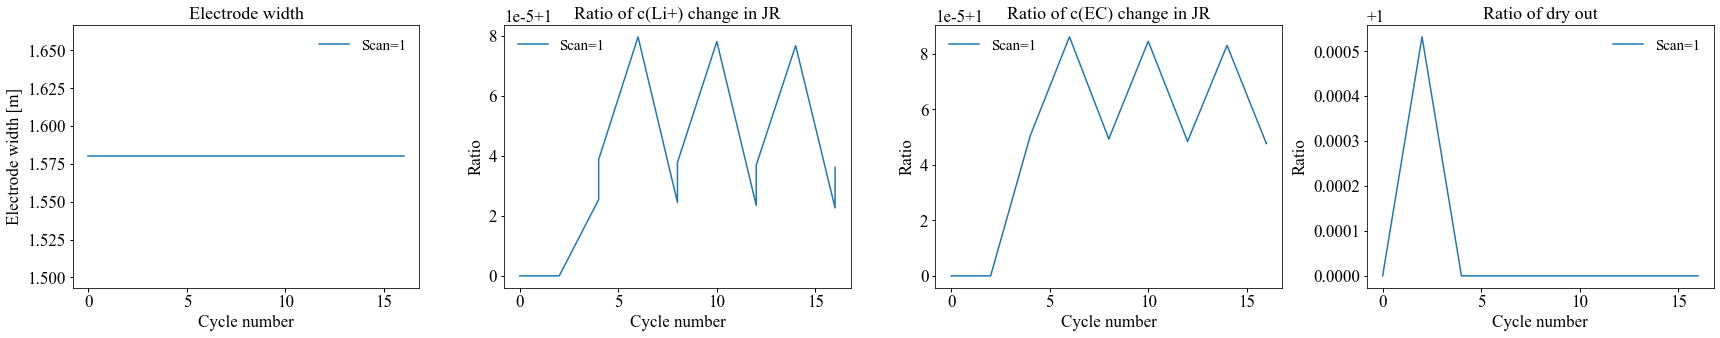

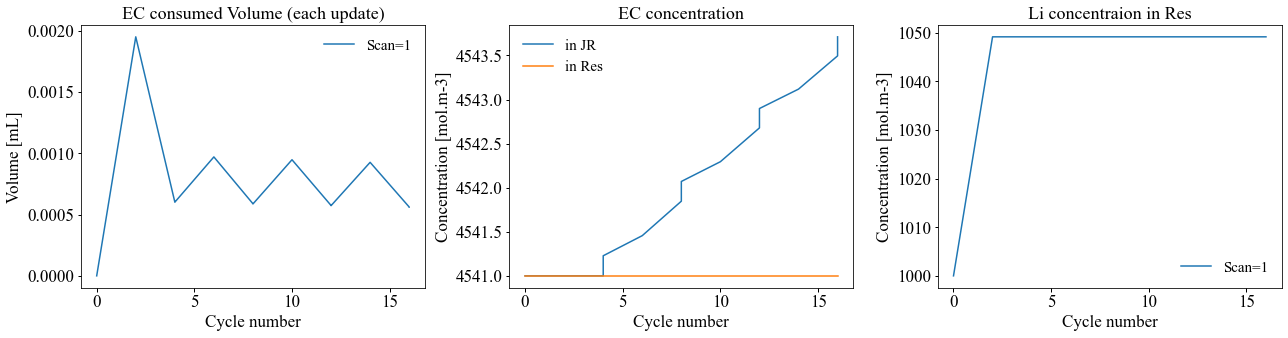

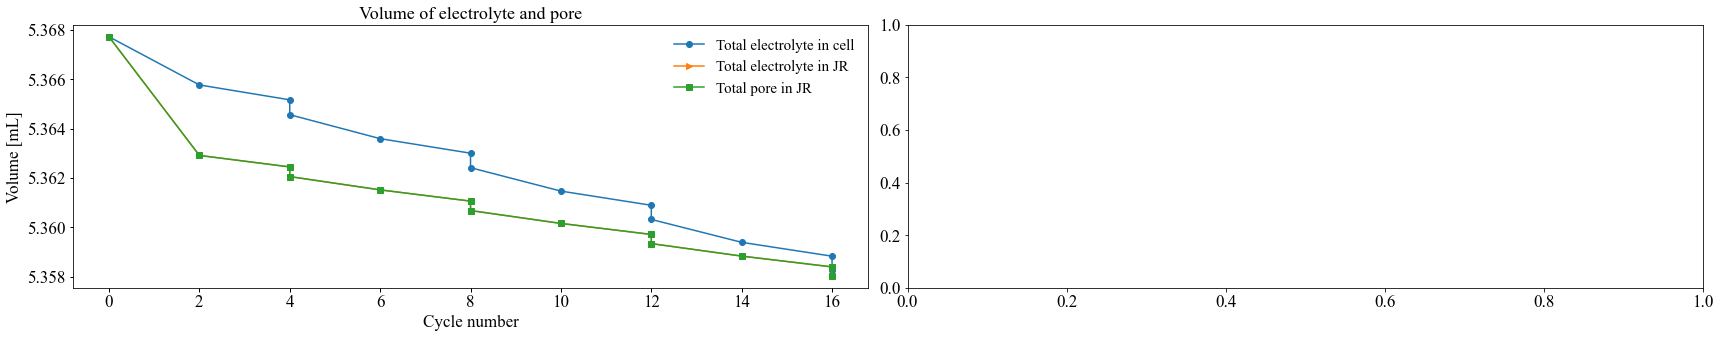

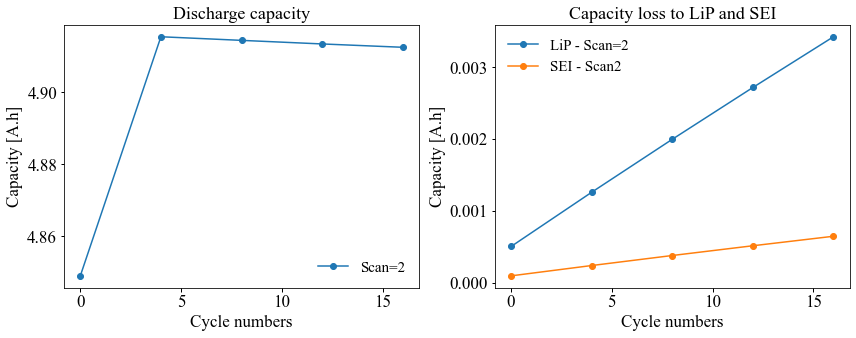

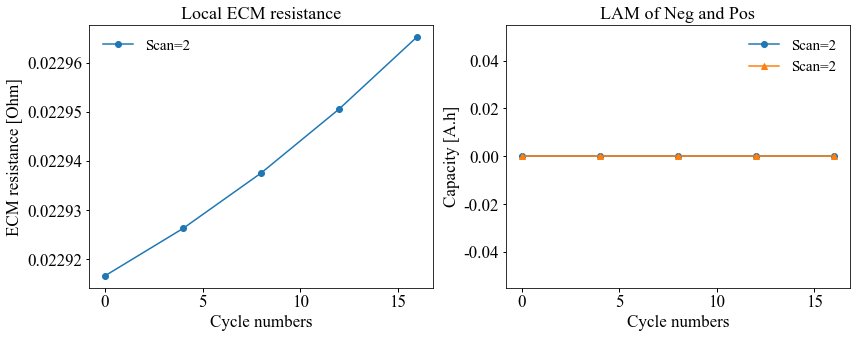

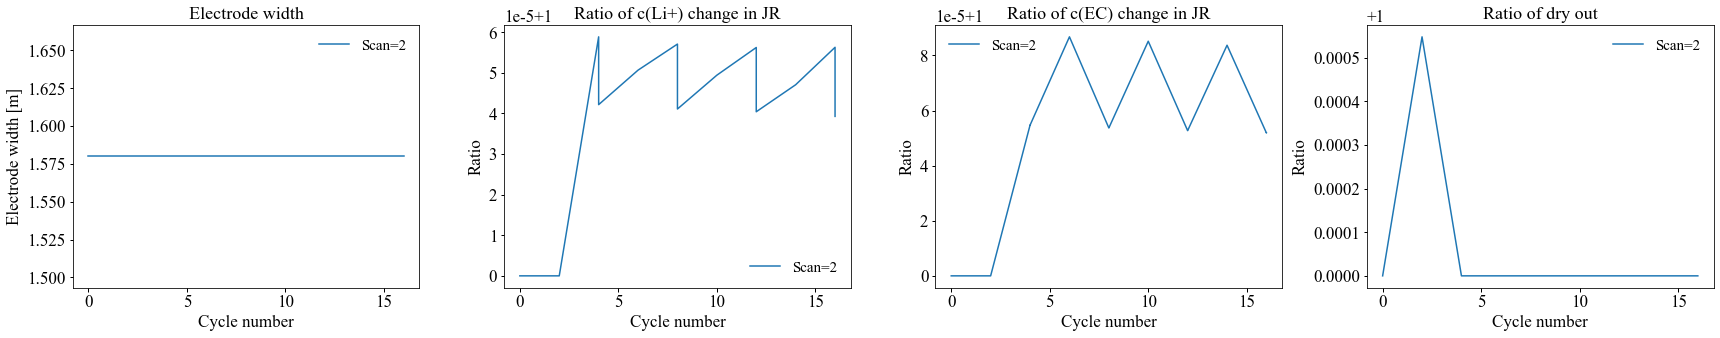

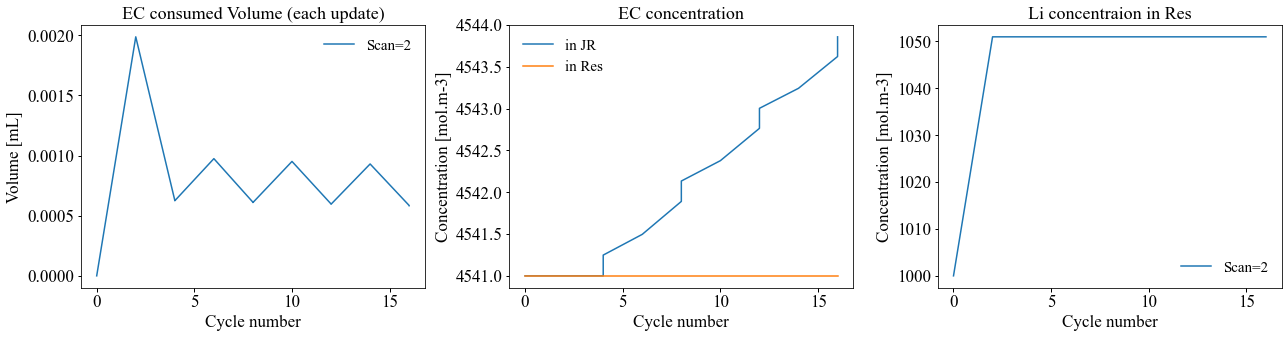

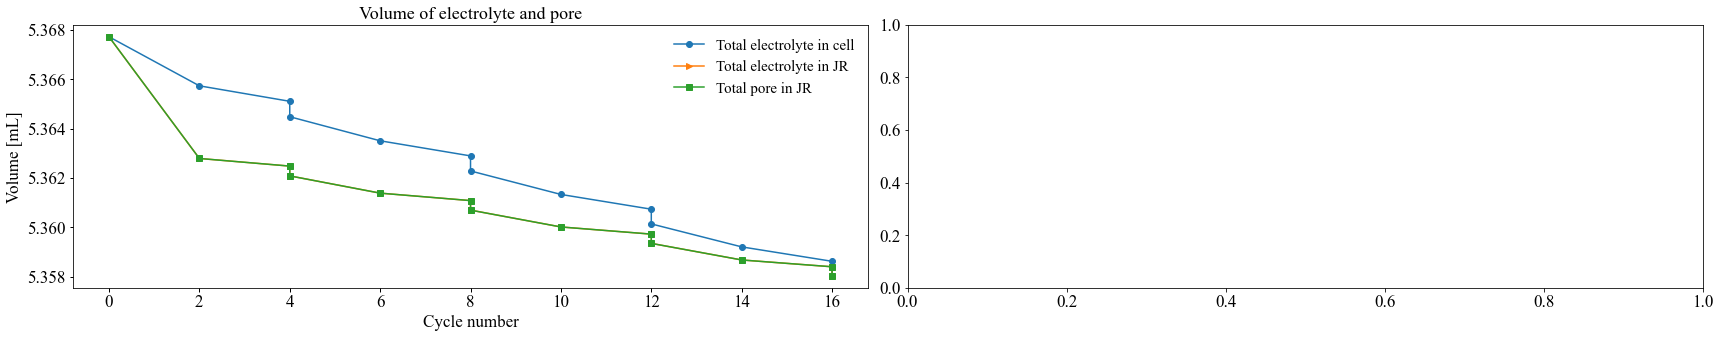

In [4]:
# Call function to run model:    
for jj in range(0,TotalScan):
    count_i = jj + 1; 
    Run_model_w__dry_out(CyclePack , DatePack_scan[jj], count_i,BasicPath , Target, book_name_xlsx)